<img src="../figs/holberton_logo.png" alt="logo" width="500"/>

# Classification of Hand Written Digits

## 0. Image Classification Task

Image classification is a fundamental task in machine learning and computer vision where the goal is to **assign a label to an image from a predefined set of categories**. This task involves analyzing the content of an image and identifying the objects or patterns present in it.


### Importance of Image Classification:

- **Medical Diagnosis**: Helps in diagnosing diseases by classifying medical images, such as X-rays and MRI scans, enabling early detection and treatment.

- **Security and Surveillance**: Enhances security systems by identifying objects, activities, or individuals in surveillance footage.

- **Retail and E-commerce**: Improves customer experience by automatically tagging products, enabling visual search, and providing personalized recommendations.

- **Self-Driving Cars**: Essential for autonomous vehicles to recognize and respond to various objects on the road, such as traffic signs, pedestrians, and other vehicles.

This example shows how to build a feed forward neural network that can be used to recognize images of hand-written digits, from 0-9.

### Basic Image Classification through the MNIST dataset

The MNIST dataset is a widely used benchmark in the field of machine learning and computer vision, consisting of 70,000 grayscale images of handwritten digits (0-9), each sized 28x28 pixels. It includes 60,000 training images and 10,000 testing images. MNIST serves as a standard for evaluating and comparing the performance of various neural network architectures due to its simplicity, well-structured format, and the broad availability of pre-existing results for reference

### Workflow

<img src="../figs/3-supervised/pipeline.png" alt="logo" width="900"/>


Our workflow will consist of the following steps
- import libraries needed to compile and train the neural network and visualize data
- get the MNIST dataset of handwritten digits
- preprocess the data
- split the dataset into data used for training and testing
- build the neural network
- train the neural network
- test the neural network by evaluating its performance



## Import libraries
- tensorflow
- keras
- matplotlib

In [1]:
# Let's import the libraries we'll need
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Load the MNIST dataset
- the dataset is part of keras
- store the data in tuples for training and testing

In [2]:
# Now, let's load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Preprocess the data
- the color pixel value of each image will be represented as a float from 0 to 1

In [3]:
# Next, we'll preprocess the data by scaling it to a range of 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

## Split the dataset in train, validation and test dataset
- validation will contain the first 5000 images
- train will contain all images, but the first 5000

In [4]:
# now, we will split the dataset in train, validation and test dataset
x_val = x_train[:5000]    # validation dataset
x_train = x_train[5000:]  # train dataset
y_val = y_train[:5000]    # validation labels
y_train = y_train[5000:]  # train labels

## Build Neural Network 
- Define a sequential model containing
  - a flatten layer receiving inputs in the shape of 28 x 28 pixels
  - a Dense layer of 128 neurons, using the `relu` activation function
  - a Dense layer of 10 neurons using the `softmax` activation function

In [5]:
# Now, let's define our neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # flatten the image to 1D array
    keras.layers.Dense(128, activation='relu'),  # first dense layer with 128 neurons and relu activation
    keras.layers.Dense(10, activation='softmax') # output layer with 10 neurons (one for each class) and softmax activation
])

## Compile the model
- use the `adam` optimizer
- use the `sparse categorical cross entropy` loss function
- use `accuracy` as metrics

In [6]:
# Now, let's compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
- use method `fit` to train the model for 5 epochs
- use also the validation data

In [7]:
# Now, let's train the model, and also save the history of training and validation
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2718 - accuracy: 0.9223 - val_loss: 0.1501 - val_accuracy: 0.9572
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1198 - accuracy: 0.9644 - val_loss: 0.1113 - val_accuracy: 0.9682
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0832 - accuracy: 0.9750 - val_loss: 0.0863 - val_accuracy: 0.9748
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0903 - val_accuracy: 0.9736
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0798 - val_accuracy: 0.9764


## Evaluate the model
- evaluate the model on the test set
- store the test loss and the test accuracy

In [8]:
# Now, let's evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.9737
Test accuracy: 0.9736999869346619


## Visualize data
- use `matplotlib.pyplot` to plot the training and validation accuracy and loss
- display the number of epochs and the accuracy

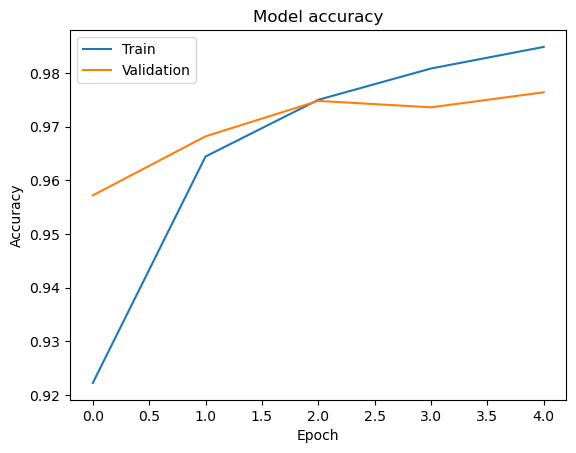

In [9]:
# Now, let's plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluation Metrics

313/313 [==============================] - 1s 3ms/step
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.99      0.96      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



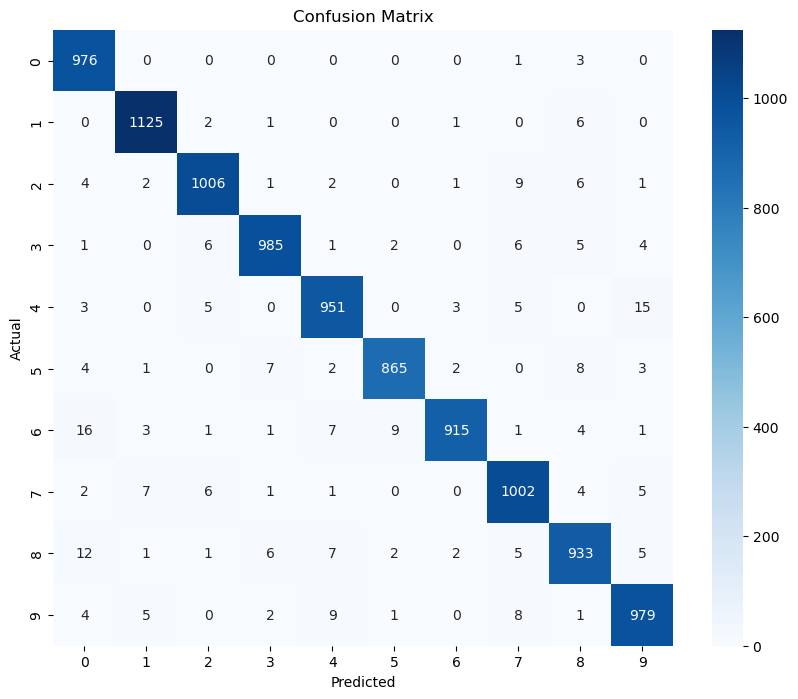

In [12]:
# Import necessary libraries for classification metrics
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Visualize the classification of several images
- select 20 images at random
- visualize the images alongside their labels in a grid-like plot

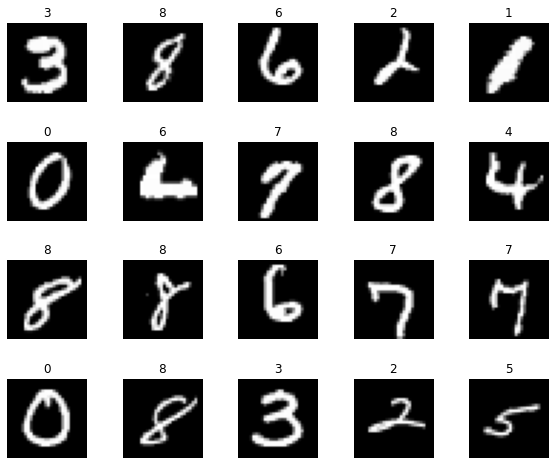

In [ ]:
import numpy as np
random_indices = np.random.randint(0, len(x_train), 20)
random_images = x_train[random_indices]
random_labels = y_train[random_indices]

fix, axes = plt.subplots(4, 5, figsize=(10, 8))
axes = axes.ravel()

for i, ax in enumerate(axes):
  ax.imshow(random_images[i], cmap='gray')
  ax.axis("off")
  ax.set_title(str(random_labels[i]))

plt.subplots_adjust(hspace=0.5)
plt.show()

## Congrats on building your (first) neural network